In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# pd.set_option('max_colwidth', 50)
# set this if you need to

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [223]:
businesses = pd.read_csv('./businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
businesses = businesses[list(businesses.columns[:2]) + ['postal_code']  + ['TaxCode'] + ['application_date'] + ['owner_name']+ ['owner_zip']]
businesses.head()

# dtype casts the column as a specific data type

,business_id,name,postal_code,TaxCode,application_date,owner_name,owner_zip
0,10,Tiramisu Kitchen,94104,H24,NaN,Tiramisu LLC,94104
1,19,Nrgize Lifestyle Cafe,94109,H24,NaN,24 Hour Fitness Inc,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,94104,H24,NaN,OMNI San Francisco Hotel Corp,94104
3,31,Norman's Ice Cream and Freezes,94133,H24,NaN,Norman Antiforda,94133
4,45,CHARLIE'S DELI CAFE,94110,H24,10/10/2001,"HARB, CHARLES AND KRISTIN",94114


In [310]:
inspections = pd.read_csv('./inspections_plus.csv', parse_dates=['date'])
inspections['inspection_id'] = inspections.index

inspections.head()


,business_id,Score,date,type,inspection_id
0,10,NaN,2014-08-07,Reinspection/Followup,0
1,10,94.0,2014-07-29,Routine - Unscheduled,1
2,10,NaN,2014-01-24,Reinspection/Followup,2
3,10,92.0,2014-01-14,Routine - Unscheduled,3
4,19,94.0,2014-11-10,Routine - Unscheduled,4


In [311]:
violations = pd.read_csv('./violations_plus.csv', parse_dates=['date'])
violations.head()

,business_id,date,ViolationTypeID,risk_category,description
0,10,2014-01-14,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,2014-01-14,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,2014-01-14,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,2014-07-29,103129,Moderate Risk,Insufficient hot water or running water
4,10,2014-07-29,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [324]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html
#merge(left, right, how='inner', on=None, left_on=None, right_on=None,
#      left_index=False, right_index=False, sort=True,
#      suffixes=('_x', '_y'), copy=True, indicator=False)

restaurant_scores1 = pd.merge(violations, inspections, how='outer', on=['business_id', 'date'])
restaurant_scores = pd.merge(restaurant_scores1, businesses, how='outer', on=['business_id'])

restaurant_scores.head()


,business_id,date,ViolationTypeID,risk_category,description,Score,type,inspection_id,name,postal_code,TaxCode,application_date,owner_name,owner_zip
0,10.0,2014-01-14,103154.0,Low Risk,Unclean or degraded floors walls or ceilings,92.0,Routine - Unscheduled,3.0,Tiramisu Kitchen,94104,H24,NaN,Tiramisu LLC,94104
1,10.0,2014-01-14,103119.0,Moderate Risk,Inadequate and inaccessible handwashing facili...,92.0,Routine - Unscheduled,3.0,Tiramisu Kitchen,94104,H24,NaN,Tiramisu LLC,94104
2,10.0,2014-01-14,103145.0,Low Risk,Improper storage of equipment utensils or linens,92.0,Routine - Unscheduled,3.0,Tiramisu Kitchen,94104,H24,NaN,Tiramisu LLC,94104
3,10.0,2014-07-29,103129.0,Moderate Risk,Insufficient hot water or running water,94.0,Routine - Unscheduled,1.0,Tiramisu Kitchen,94104,H24,NaN,Tiramisu LLC,94104
4,10.0,2014-07-29,103144.0,Low Risk,Unapproved or unmaintained equipment or utensils,94.0,Routine - Unscheduled,1.0,Tiramisu Kitchen,94104,H24,NaN,Tiramisu LLC,94104


In [325]:
# 2 Which ten business have had the most inspections?

#restaurant_scores[restaurant_scores.name=='BURGER KING'].date.value_counts()

restaurant_scores.groupby('name').date.nunique().order(ascending=False).head(10)



/Users/jhuffman/anaconda/lib/python2.7/site-packages/pandas/core/groupby.py:2854: FutureWarning: In the future, NAT != NAT will be True rather than False.
  inc = np.r_[1, val[1:] != val[:-1]]
/Users/jhuffman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: order is deprecated, use sort_values(...)


name
Peet's Coffee & Tea           74
Starbucks Coffee              61
Whole Foods Market            49
STARBUCKS                     43
San Francisco Soup Company    39
STARBUCKS COFFEE              39
Specialty's Cafe & Bakery     38
Subway Sandwiches             31
Lee's Deli                    30
KENTUCKY FRIED CHICKEN        27
Name: date, dtype: int64

In [354]:
# 3 Group and count the inspections by type

#restaurant_scores.groupby(['name','date','type']).nunique()
#df.groupby("date").agg({"duration": np.sum, "user_id": lambda x: x.nunique()})
#restaurant_scores.groupby('type').agg({'name': lambda x: x.nunique()})

#restaurant_scores.groupby('type').type.value_counts()

#print inspections.type.value_counts()
print restaurant_scores.groupby('type').inspection_id.nunique().sort_values(ascending=False)




type
Routine - Unscheduled                15481
Reinspection/Followup                 5386
New Ownership                         1877
Complaint                             1634
New Construction                      1613
Non-inspection site visit              840
Complaint Reinspection/Followup        163
Structural Inspection                  120
Foodborne Illness Investigation        100
Routine - Scheduled                     63
Administrative or Document Review        4
Special Event                            2
Multi-agency Investigation               2
Name: inspection_id, dtype: int64


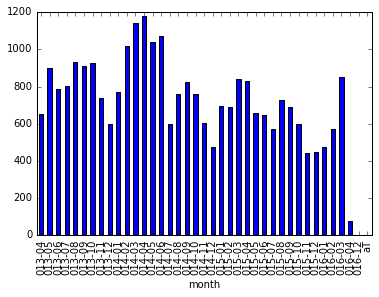

In [353]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap
#restaurant_scores['date'].dtype

restaurant_scores['month'] = restaurant_scores['date'].apply(lambda x:str(x)[1:7])
restaurant_scores.head(10)
restaurant_scores.groupby('month').inspection_id.nunique().plot(kind='bar')




In [300]:
# 5 Which zip code contains the most high risk violations?

#restaurant_scores.risk_category.value_counts()
#restaurant_scores.owner_zip[restaurant_scores.risk_category=='High Risk'].value_counts().head(1)
restaurant_scores.postal_code[restaurant_scores.risk_category=='High Risk'].value_counts().head(1)





94133    514
Name: owner_zip, dtype: int64

In [ ]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?

##CHECK THIS ONE 

In [304]:
# 7 Examining the descriptions, what is the most common violation?
restaurant_scores.description.value_counts().head(1)



Unclean or degraded floors walls or ceilings    3757
Name: description, dtype: int64

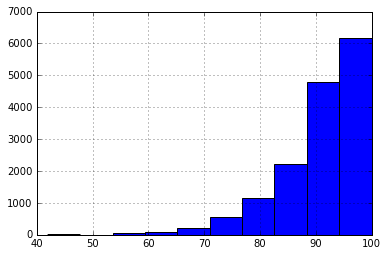

In [372]:
# 8 Create a hist of the scores with 10 bins

#restaurant_scores.head()
#restaurant_scores.groupby('inspection_id').Score.hist(bins=10)

inspections.Score.hist(bins=10)


#Check this one

In [ ]:
# 9 Can you predict risk category based on the other features in this dataset?
#Check this one

In [ ]:
# 10 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/

In [ ]:
############################
### A Little More Morbid ###
############################

In [5]:
killings = pd.read_csv('./police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [6]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race

killings.rename(columns={'lawenforcementagency':'agency', 'raceethnicity':'race'}, inplace=True)
killings.head()

,Unnamed: 0,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [7]:
# 2. Show the count of missing values in each column
killings.isnull().sum() 

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [8]:
# 3. replace each null value in the dataframe with the string "Unknown"
killings.fillna(value='Unknown',inplace=True)
killings.isnull().sum() 



Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    0
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [15]:
# 4. How many killings were there so far in 2015?
killings['name'].count()



467

In [16]:
# 5. Of all killings, how many were male and how many female?
# killings.groupby('gender').describe()
killings['gender'].value_counts()



Male      445
Female     22
Name: gender, dtype: int64

In [17]:
# 6. How many killings were of unarmed people?
killings['armed'][killings.armed=='No'].count()


102

In [19]:
# 7. What percentage of all killings were unarmed?

killings['armed'].value_counts()
a = killings['armed'].count()
b = killings['armed'][killings.armed=='No'].count()
unarmed_Killings = (float(b)/float(a))*100
print unarmed_Killings



21.8415417559


In [20]:
# 8. What are the 5 states with the most killings?
killings.state.value_counts().head(5)


CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

In [21]:
# 9. Show a value counts of deaths for each race
killings.race.value_counts()


White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

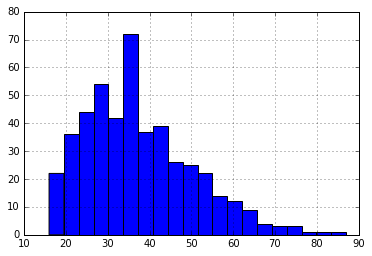

In [74]:
# 10. Display a histogram of ages of all killings
import matplotlib.pyplot as plt
%matplotlib inline
killings.age.hist(bins=20)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x17805f090>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x181c2ac90>]], dtype=object)

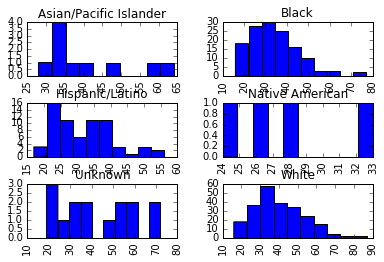

In [75]:
# 11. Show 6 histograms of ages by race
killings.age.hist(by=killings.race)



In [77]:
# 12. What is the average age of death by race?
killings.groupby('race').age.mean()


race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

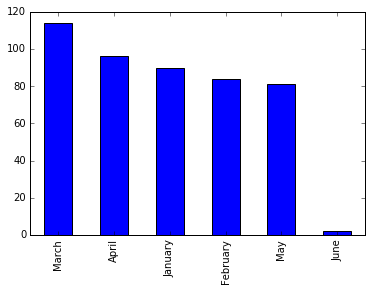

In [79]:
# 13. Show a bar chart with counts of deaths every month
killings.month.value_counts().plot(kind='bar')


In [ ]:
###################
### Less Morbid ###
###################

In [22]:
majors = pd.read_csv('./college-majors.csv')
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [23]:
# 1. Delete the columns (employed_full_time_year_round, major_code)

del majors['Employed_full_time_year_round']
del majors['Major_code']


In [28]:
# 2. Show the cout of missing values in each column
majors.isnull().sum()


Unnamed: 0           0
Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

In [91]:
# 3. What are the top 10 highest paying majors?
majors[['Major','Median']].sort_index(by='Median', ascending = False).head(10)


/Users/jhuffman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


,Major,Median
59,PETROLEUM ENGINEERING,125000
154,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,106000
57,NAVAL ARCHITECTURE AND MARINE ENGINEERING,97000
55,METALLURGICAL ENGINEERING,96000
58,NUCLEAR ENGINEERING,95000
56,MINING AND MINERAL ENGINEERING,92000
97,MATHEMATICS AND COMPUTER SCIENCE,92000
48,ELECTRICAL ENGINEERING,88000
45,CHEMICAL ENGINEERING,86000
51,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,85000


/Users/jhuffman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


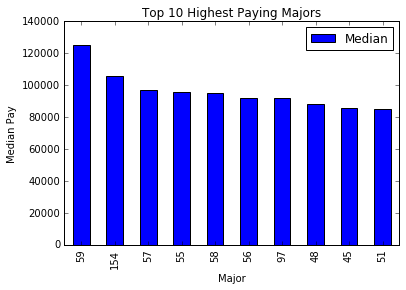

In [98]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!
majors[['Major','Median']].sort_index(by='Median', ascending = False).head(10).plot(kind='bar', title='Top 10 Highest Paying Majors')
plt.xlabel('Major')
plt.ylabel('Median Pay')


#check (working but wrong x axis label)

In [26]:
# 5. What is the average median salary for each major category?

majors.groupby('Major_category').Median.mean()


Major_category
Agriculture & Natural Resources        55000.000000
Arts                                   43525.000000
Biology & Life Science                 50821.428571
Business                               60615.384615
Communications & Journalism            49500.000000
Computers & Mathematics                66272.727273
Education                              43831.250000
Engineering                            77758.620690
Health                                 56458.333333
Humanities & Liberal Arts              46080.000000
Industrial Arts & Consumer Services    52642.857143
Interdisciplinary                      43000.000000
Law & Public Policy                    52800.000000
Physical Sciences                      62400.000000
Psychology & Social Work               44555.555556
Social Science                         53222.222222
Name: Median, dtype: float64

In [41]:
# 6. Show only the top 5 paying major categories

print majors.groupby('Major_category').Median.mean().order(ascending=False).head(5)


Major_category
Engineering                77758.620690
Computers & Mathematics    66272.727273
Physical Sciences          62400.000000
Business                   60615.384615
Health                     56458.333333
Name: Median, dtype: float64


/Users/jhuffman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


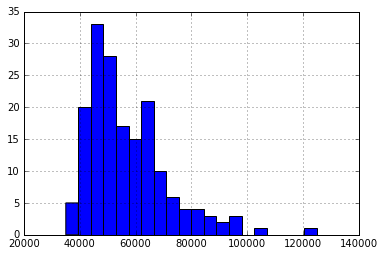

In [45]:
# 7. Plot a histogram of the distribution of median salaries
import matplotlib.pyplot as plt
%matplotlib inline
majors.Median.hist(bins=20)


Axes(0.125,0.125;0.775x0.775)
Major_category
Agriculture & Natural Resources        Axes(0.1,0.15;0.8x0.75)
Arts                                   Axes(0.1,0.15;0.8x0.75)
Biology & Life Science                 Axes(0.1,0.15;0.8x0.75)
Business                               Axes(0.1,0.15;0.8x0.75)
Communications & Journalism            Axes(0.1,0.15;0.8x0.75)
Computers & Mathematics                Axes(0.1,0.15;0.8x0.75)
Education                              Axes(0.1,0.15;0.8x0.75)
Engineering                            Axes(0.1,0.15;0.8x0.75)
Health                                 Axes(0.1,0.15;0.8x0.75)
Humanities & Liberal Arts              Axes(0.1,0.15;0.8x0.75)
Industrial Arts & Consumer Services    Axes(0.1,0.15;0.8x0.75)
Interdisciplinary                      Axes(0.1,0.15;0.8x0.75)
Law & Public Policy                    Axes(0.1,0.15;0.8x0.75)
Physical Sciences                      Axes(0.1,0.15;0.8x0.75)
Psychology & Social Work               Axes(0.1,0.15;0.8x0.75)
Social Sci

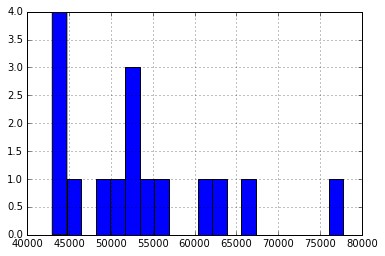

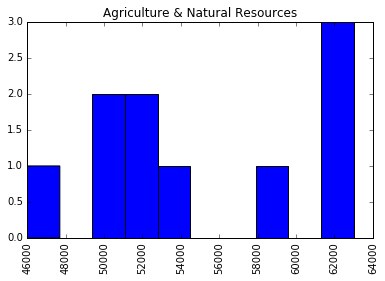

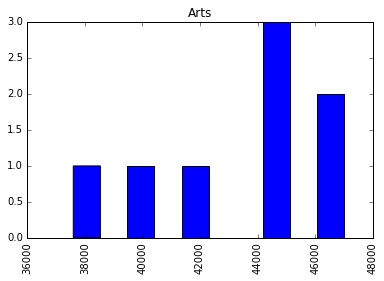

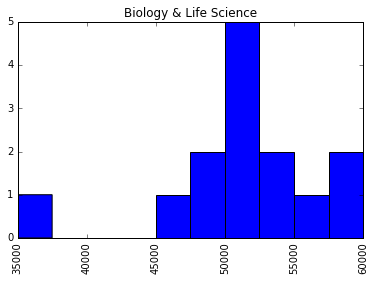

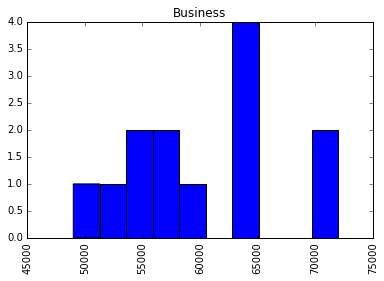

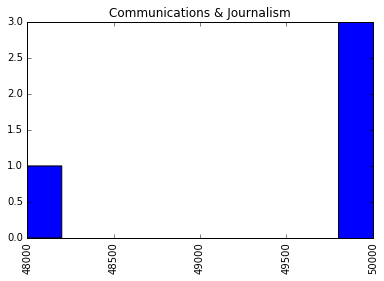

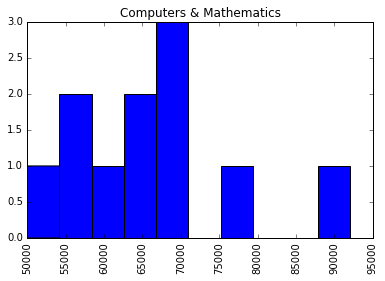

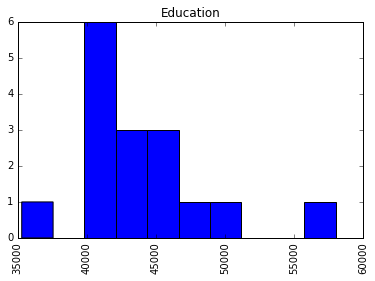

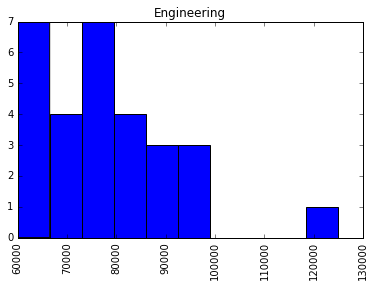

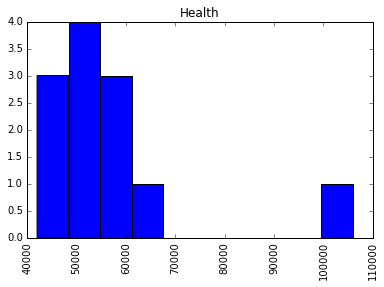

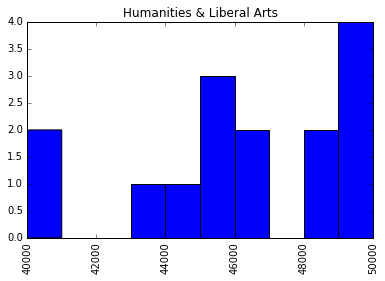

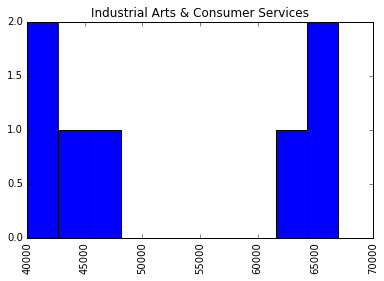

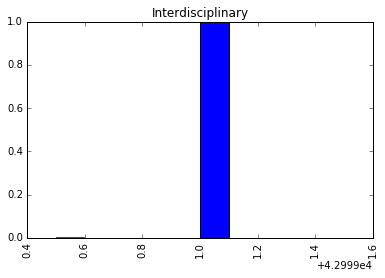

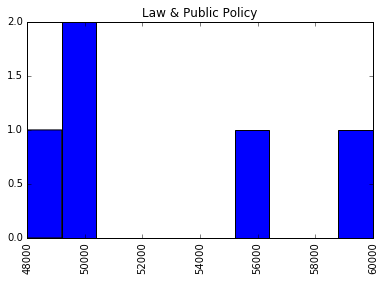

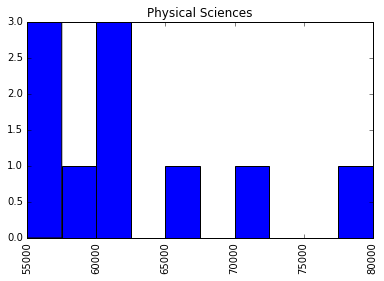

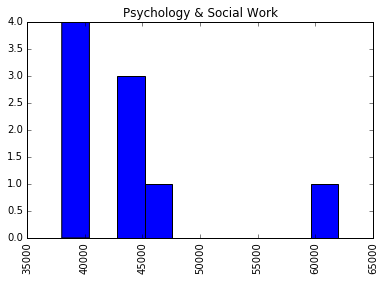

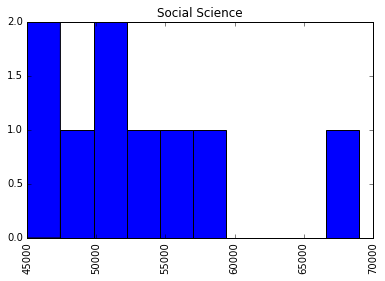

In [363]:
# 8. Plot a histogram of the distribution of median salaries by major category
import matplotlib.pyplot as plt
%matplotlib inline
print majors.groupby('Major_category').Median.mean().hist(bins=20)

print majors.groupby('Major_category').Median.hist(by=majors.Major_category)





In [103]:
# 9. What are the top 10 most UNemployed majors?

majors[['Major','Unemployed']].sort_index(by='Unemployed', ascending= False).head(10)



/Users/jhuffman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,Major,Unemployed
161,BUSINESS MANAGEMENT AND ADMINISTRATION,147261
158,GENERAL BUSINESS,85626
114,PSYCHOLOGY,79066
159,ACCOUNTING,75379
13,COMMUNICATIONS,54390
73,ENGLISH LANGUAGE AND LITERATURE,52248
164,MARKETING AND MARKETING RESEARCH,51839
132,POLITICAL SCIENCE AND GOVERNMENT,40376
25,GENERAL EDUCATION,38742
78,BIOLOGY,36757


In [66]:
# What are the unemployment rates?
majors[['Major','Unemployment_rate']].sort_index(by='Unemployment_rate')



/Users/jhuffman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


,Major,Unemployment_rate
26,EDUCATIONAL ADMINISTRATION AND SUPERVISION,0.000000
51,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,0.000000
85,PHARMACOLOGY,0.016111
111,MATERIALS SCIENCE,0.022333
97,MATHEMATICS AND COMPUTER SCIENCE,0.024900
0,GENERAL AGRICULTURE,0.026147
155,TREATMENT THERAPY PROFESSIONS,0.026292
153,NURSING,0.026797
1,AGRICULTURE PRODUCTION AND MANAGEMENT,0.028636
2,AGRICULTURAL ECONOMICS,0.030248


In [116]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?

majors.groupby('Major_category').Unemployed.apply(lambda x: x.mean()).order(ascending=False).head(10)



/Users/jhuffman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: order is deprecated, use sort_values(...)


Major_category
Business                       33415.153846
Communications & Journalism    25299.750000
Social Science                 14683.333333
Arts                           13015.625000
Humanities & Liberal Arts      11942.400000
Psychology & Social Work       11578.444444
Law & Public Policy             8609.800000
Education                       7833.500000
Computers & Mathematics         7270.363636
Health                          6251.083333
Name: Unemployed, dtype: float64

In [119]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042

majors['sample_employment_rate'] = majors['Employed'] / majors['Total']



In [118]:
# 12. Create a "sample_unemployment_rate" column
# this column should be 1 - "sample_employment_rate"

majors['sample_unemployment_rate'] = 1- majors['sample_employment_rate']

majors.head()


,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate,sample_unemployment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,0.704225,0.295775
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0,0.806338,0.193662
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0,0.775173,0.224827
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0,0.783948,0.216052
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0,0.711738,0.288262
